### Plotting bias maps

In [11]:
import sys
sys.path.insert(0,'../../')
from radiation import process_ceres_data, process_model_data
from radiation import plot_mean_bias

In [12]:
from aqua import catalogue, inspect_catalogue
cat=catalogue()

IFS	fdb-tco399	fdb-long data tco399 grid
	- fdb-long-2d	FDB data tco399 grid
	- fdb-long-3d	FDB data tco399 grid

IFS-NEMO	control-1950-dev	FDB IFS/NEMO tco1279-orca025 control 1950 run
	- hourly-native	hourly data on native grid TCo1279 (about 10km). Contains tprate(260048), 2t(167), 10u(165), 10v(166), 100u(228246), 100v(228247), sr(173), blh(159), 2d(168), skt(235), chnk(148). See fix yaml for derived vars.
	- hourly-1deg	hourly data on r100 grid. Contains tprate(260048), sf(144), 2t(167), 10u(165), blh(159), sshf(146), slhf(147), ssrd(169), ssr(176), strd(175), str(177), ttr(179), e(182), tsr(178), ewss(180), nsss(181), chnk(148), sro(8), ssro(9). See fix yaml for derived vars.
	- 6hourly-1deg	6hourly data on r100 grid. Contains z(129).
	- monthly-1deg-2d	monthly data on r100 grid. Contains tcc(164), sd(141), tciw(79), tclw(78), msl(151), tcwv(137), lcc(186), mcc(187), hcc(188).
	- monthly-1deg-3d	monthly data on r100 grid. Contains u(131), v(132), t(130), r(157), q(133).
	- lra-r1

In [13]:
ifs_nemo_historical_dev = process_model_data(model =  'IFS-NEMO' , exp = 'historical-1990-dev-lowres' , source = 'lra-r100-monthly', fix = True)
ceres = process_ceres_data(exp = "ebaf-toa41", source = "monthly", fix=True)

2024-02-07 13:57:51 :: Reader :: ERROR    -> The requested deafult fixer name IFS-NEMO-default does not exist in fixes files
2024-02-07 13:57:51 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990-dev-lowres, source lra-r100-monthly
/opt/conda/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/conda/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/opt/conda/lib/python3.11/site-packages/xa

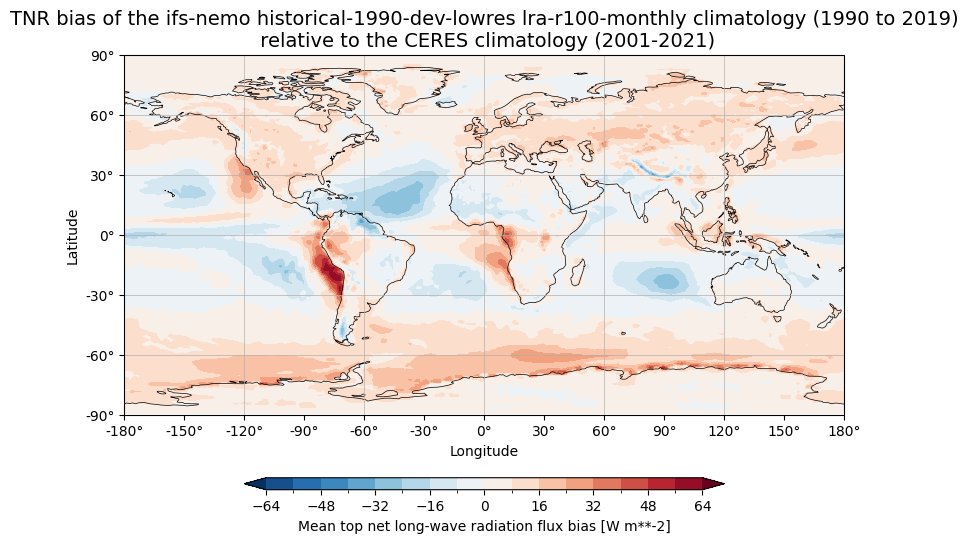

In [14]:
plot_mean_bias(ifs_nemo_historical_dev, var='tnr', ceres=ceres, start_year='1990', end_year='2019')

/opt/conda/lib/python3.11/site-packages/sparse/_coo/core.py:215: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sparse/_coo/core.py:215: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sparse/_coo/core.py:215: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sparse/_coo/core.py:215: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sparse/_coo/core.py:215: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sparse/_coo/core.py:215: DeprecationWarning: coords should be an ndarray. This will r

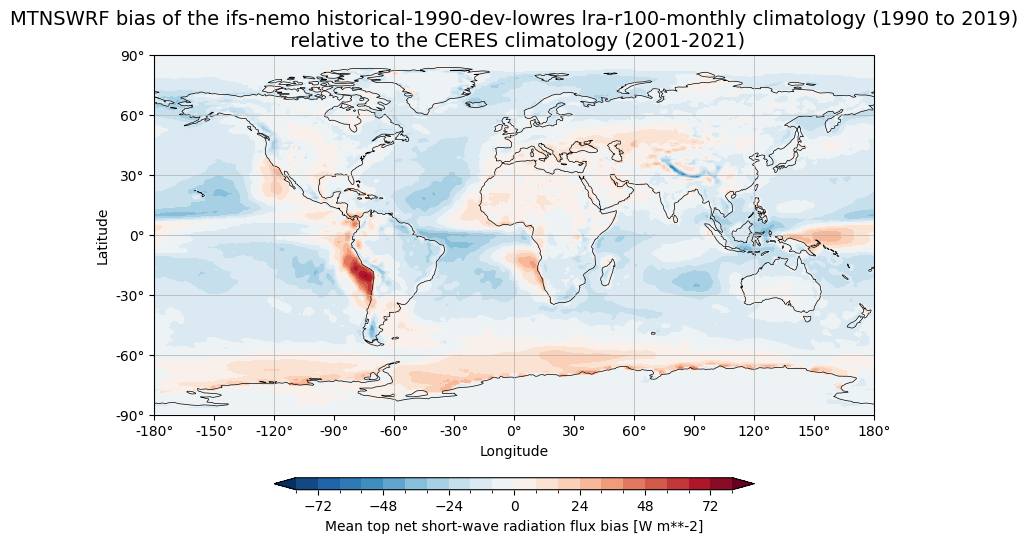

In [15]:
#plot_mean_bias(ifs_nemo_historical_dev, var='tnr', ceres=ceres, start_year='1990', end_year='1999', seasons=True, statistics=True)
plot_mean_bias(ifs_nemo_historical_dev, var='mtnswrf', ceres=ceres, start_year='1990', end_year='2019', seasons=False)

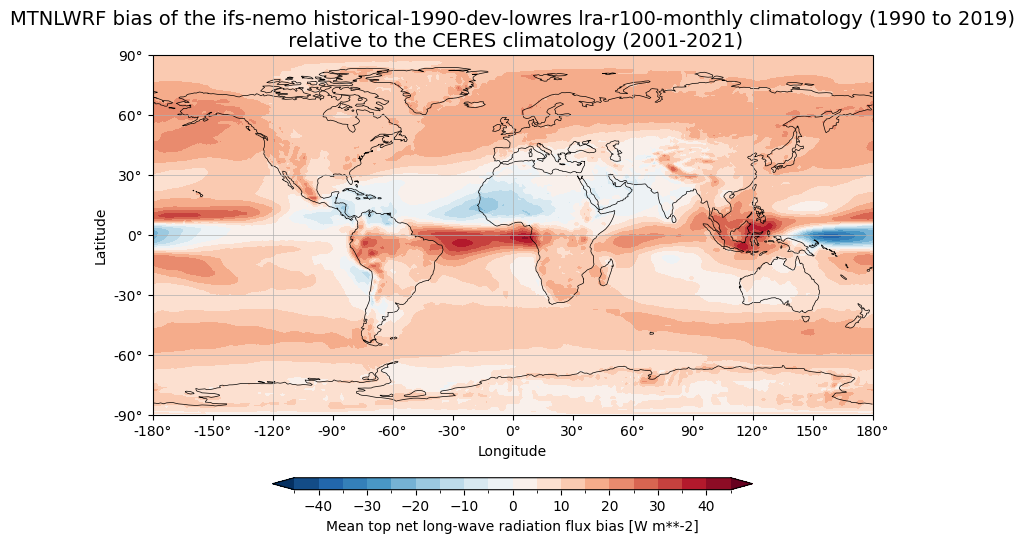

In [16]:
plot_mean_bias(ifs_nemo_historical_dev, var='mtnlwrf', ceres=ceres, start_year='1990', end_year='2019', seasons=False)

/users/susayed/AQUA/diagnostics/radiation/notebooks/../../radiation/radiation_functions.py:592: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_plot.collections[0].set_edgecolor("face")
/users/susayed/AQUA/diagnostics/radiation/notebooks/../../radiation/radiation_functions.py:592: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_plot.collections[0].set_edgecolor("face")
/users/susayed/AQUA/diagnostics/radiation/notebooks/../../radiation/radiation_functions.py:592: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_plot.collections[0].set_edgecolor("face")
/users/susayed/AQUA/diagnostics/radiation/notebooks/../../radiation/radiation_functions.py:592: MatplotlibDeprecationWarning: The collections attribute

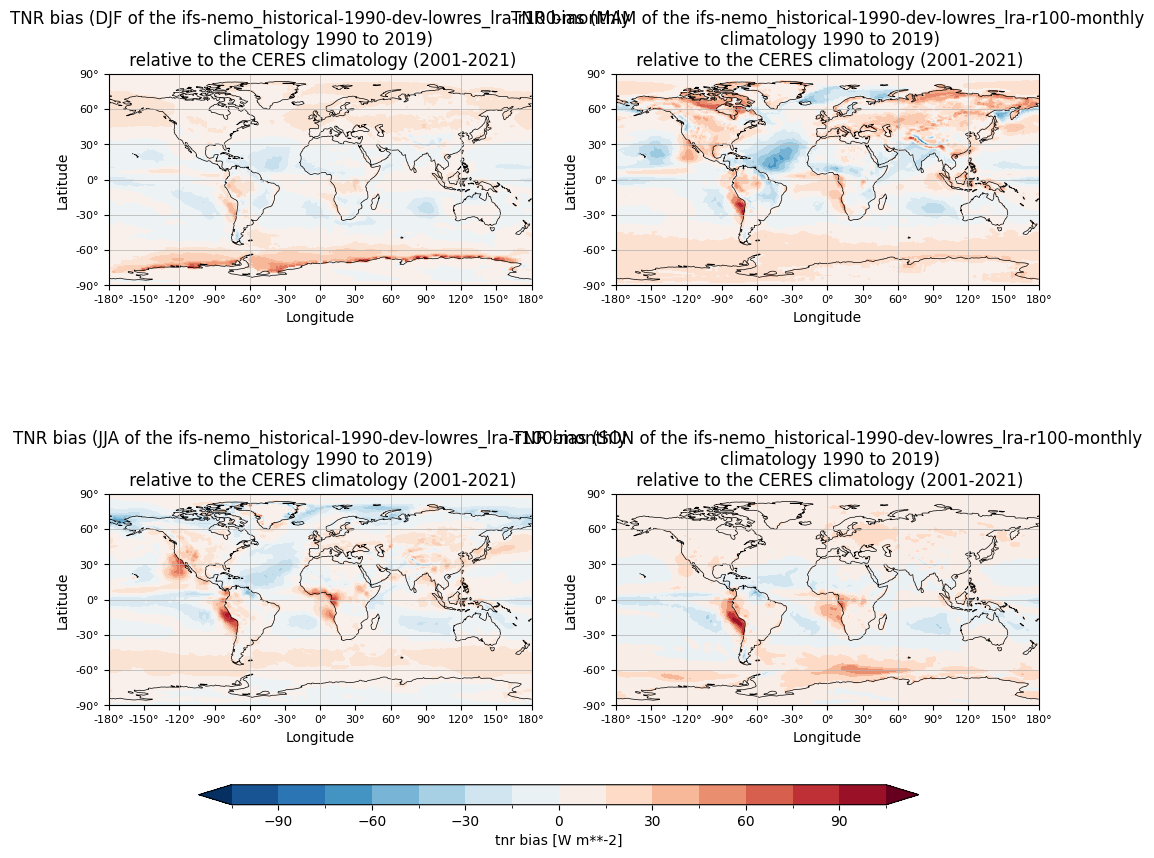

In [17]:
plot_mean_bias(ifs_nemo_historical_dev, var='tnr', ceres=ceres, start_year='1990', end_year='2019', seasons=True)